## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

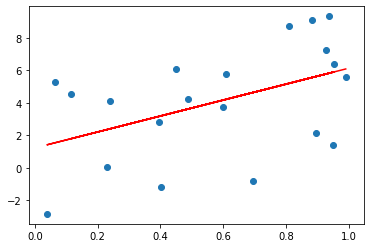

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

X = np.random.random((20, 1))
def assmuing_function(x):
    return x * 23 / 5 + random.randint(-5, 5)
y = [assmuing_function(x) for x in X]
y = np.array(y)
reg = LinearRegression().fit(X.reshape(-1, 1), y)
def f(x): 
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [11]:
reg.predict([[1]])

array([[6.12388535]])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [14]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)
def predict(x, k=3):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)
X, y

(array([[0.48904965],
        [0.44910519],
        [0.39573915],
        [0.81042486],
        [0.88496603],
        [0.60870971],
        [0.9549311 ],
        [0.69605233],
        [0.40059163],
        [0.11465416],
        [0.92877477],
        [0.59870464],
        [0.23998494],
        [0.229017  ],
        [0.93682711],
        [0.89570833],
        [0.95171194],
        [0.06332862],
        [0.03807221],
        [0.99095934]]), array([[ 4.24962837],
        [ 6.06588388],
        [ 2.82040007],
        [ 8.72795434],
        [ 9.07084372],
        [ 5.80006467],
        [ 6.39268307],
        [-0.79815926],
        [-1.15727851],
        [ 4.52740915],
        [ 7.27236393],
        [ 3.75404134],
        [ 4.10393072],
        [ 0.05347821],
        [ 9.3094047 ],
        [ 2.12025832],
        [ 1.37787493],
        [ 5.29131165],
        [-2.82486784],
        [ 5.55841295]]))

In [15]:
myself_knn = model(X, y)
predict(1)

[(array([0.48904965]), array([4.24962837])), (array([0.44910519]), array([6.06588388])), (array([0.39573915]), array([2.82040007]))]


4.378637440753032

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [16]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [17]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [18]:
from icecream import ic
from collections import Counter
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

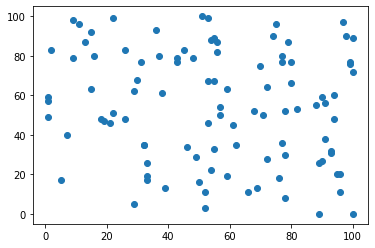

In [19]:
from sklearn.cluster import KMeans
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

In [20]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=3, max_iter=300)
cluster.fit(tranning_data)
cluster.cluster_centers_

array([[66.90909091, 21.87878788],
       [21.12903226, 66.83870968],
       [74.63888889, 72.86111111]])

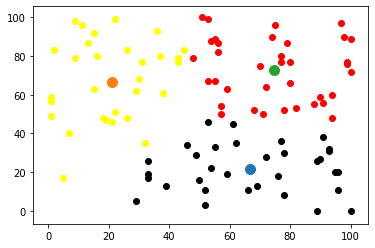

In [21]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'black', 'yellow']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型就是把特征抽象化
特征并不只是绝对的或者全面的，所以所有模型都是不对的，有些模型有用

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
underfitting：模型过于简单，没有包括足够的特征或者抽象的过于简单。这样就无法有效的学习，产生预测的模型变化小，但是结果偏差大
overfitting：与上述相反

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:
precision： 模型预测的认为是正确的 而且 确实是正确的个数 / 所有预测个数中模型认为是 正确的 总数；模型的精确度
recall：模型预测的认为是正确的 而且 确实是正确的个数 / 所有训练个数中 实际上 是正确的个数；模型的回收率
AUC：receiver operating characteristic curve曲线的 基准数以下部分
F1：2∗precision∗recall/(precision+recall)；
F2score：5∗precision∗recall/(4*precision+recall)

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:
机器学习是在给定一个框架和数据，机器能够生产相关模型，并能够根据这个模型做出预测

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
这个是正确的，模型的评价标准是否准确，就能够确实这个模型在用于评价相关的特征方面是否实际上有效。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [1]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [14]:
import numpy as np
from icecream import ic
from collections import Counter
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)
def find_the_optimal_spilter_all(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        values = set(training_data[f])
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            
            entropy_2 = entropy(sub_spliter_2)

            entropy_v = entropy_1 + entropy_2

            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    return spliter
def get_rules(dataset): 
    tree = []
    myrange = len(set(dataset.columns.tolist()) - {'bought'})
    for i in range(myrange):
        if i == 0 :
            lookup = find_the_optimal_spilter_all(training_data=dataset, target='bought')
        else:             
            dataset = dataset[dataset[lookup[0]] == lookup[1]]
            del dataset[lookup[0]]
#             print (dataset)
            lookup = find_the_optimal_spilter_all(training_data=dataset, target='bought')
        print (lookup)
        tree.append(lookup + (i+1,))
    return tree
get_rules(dataset)

('family_number', 2)
('gender', 'M')
('income', '-10')


[('family_number', 2, 1), ('gender', 'M', 2), ('income', '-10', 3)]

In [15]:
def predict(strInput,dataset):
    rates = []
    strInput = ('M','-10',1)
    features = get_rules(dataset)
    input = {}
    for i in range(3):
        input[('gender','income','family_number')[i]] = strInput[i]
    for feature in features:
        dataset = dataset[dataset[feature[0]] == feature[1]]
        rate = list(dataset['bought']).count(1) / len(list(dataset['bought']))
        rates.append(rate)
    return rates
predict('',dataset)

('family_number', 2)
('gender', 'M')
('income', '-10')


[1.0, 1.0, 1.0]

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [24]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

In [61]:
#define target function
def price(rm, k, b):
    return k * rm + b
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
# define partial derivative : k & b
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient +=  -x_i
        elif y_i < y_hat_i:
            gradient +=  x_i
    return 1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient += -1
        elif y_i < y_hat_i:
            gradient += 1
    return 1 / n * gradient
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b


Iteration 0, the loss is 91.84952375462743, parameters k is 0.08845242156820632 and b is -69.87260856074886
Iteration 1, the loss is 91.80902712524468, parameters k is 0.0947370559555581 and b is -69.87160856074885
Iteration 2, the loss is 91.76853049586212, parameters k is 0.10102169034290989 and b is -69.87060856074885
Iteration 3, the loss is 91.72803386647935, parameters k is 0.10730632473026168 and b is -69.86960856074884
Iteration 4, the loss is 91.68753723709672, parameters k is 0.11359095911761347 and b is -69.86860856074884
Iteration 5, the loss is 91.64704060771406, parameters k is 0.11987559350496525 and b is -69.86760856074883
Iteration 6, the loss is 91.6065439783313, parameters k is 0.12616022789231704 and b is -69.86660856074883
Iteration 7, the loss is 91.56604734894866, parameters k is 0.13244486227966884 and b is -69.86560856074883
Iteration 8, the loss is 91.52555071956598, parameters k is 0.1387294966670206 and b is -69.86460856074882
Iteration 9, the loss is 91.485

Iteration 131, the loss is 86.54446530549512, parameters k is 0.9117395263112923 and b is -69.74160856074823
Iteration 132, the loss is 86.50396867611222, parameters k is 0.9180241606986441 and b is -69.74060856074823
Iteration 133, the loss is 86.4634720467298, parameters k is 0.924308795085996 and b is -69.73960856074822
Iteration 134, the loss is 86.42297541734706, parameters k is 0.9305934294733478 and b is -69.73860856074822
Iteration 135, the loss is 86.38247878796435, parameters k is 0.9368780638606996 and b is -69.73760856074821
Iteration 136, the loss is 86.34198215858167, parameters k is 0.9431626982480514 and b is -69.73660856074821
Iteration 137, the loss is 86.30148552919898, parameters k is 0.9494473326354033 and b is -69.7356085607482
Iteration 138, the loss is 86.26098889981634, parameters k is 0.9557319670227551 and b is -69.7346085607482
Iteration 139, the loss is 86.22049227043364, parameters k is 0.9620166014101069 and b is -69.7336085607482
Iteration 140, the loss 

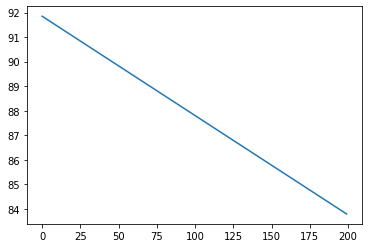

In [62]:
plt.plot(list(range(iteration_num)),losses)

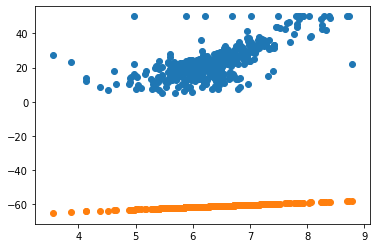

In [63]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)